### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
first_image = x_train[0]

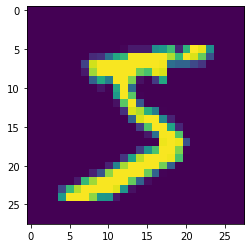

In [9]:
plt.imshow(first_image);

In [10]:
first_image.shape

(28, 28)

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_encoded = to_categorical(y_train)

In [14]:
y_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_encoded.shape

(60000, 10)

In [16]:
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
x_train = x_train.reshape(60000,28,28,1)

In [21]:
x_test = x_test.reshape(10000,28,28,1)

### Creating Model

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu' ))

In [26]:
model.add(MaxPool2D(pool_size=(2,2)))

In [27]:
model.add(Flatten())

In [28]:
model.add(Dense(128, activation='relu'))

In [29]:
#OUTPUT LAYER
model.add(Dense(10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [33]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test,y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1390 - accuracy: 0.9578 - val_loss: 0.0542 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0474 - accuracy: 0.9851 - val_loss: 0.0376 - val_accuracy: 0.9874
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0313 - accuracy: 0.9899 - val_loss: 0.0410 - val_accuracy: 0.9863


### Evaluating Loss

In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.139008,0.957783,0.054167,0.9823
1,0.047413,0.985150,0.037574,0.9874
2,0.031312,0.989867,0.041017,0.9863


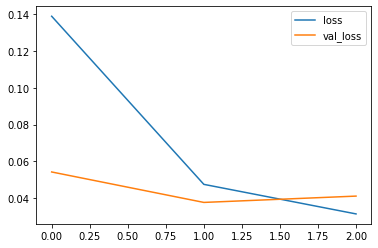

In [36]:
metrics[['loss','val_loss']].plot()

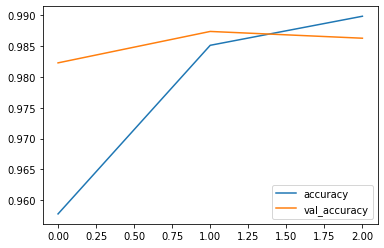

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04101652652025223, 0.986299991607666]

### Results

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [42]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [43]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[ 975,    1,    0,    0,    0,    0,    1,    2,    1,    0],
       [   0, 1131,    1,    1,    0,    1,    1,    0,    0,    0],
       [   1,    0, 1020,    0,    1,    0,    0,   10,    0,    0],
       [   1,    0,    2,  997,    0,    1,    0,    8,    1,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   1,    0,    1,   11,    0,  875,    2,    1,    0,    1],
       [   6,    2,    0,    0,    5,    2,  939,    0,    4,    0],
       [   0,    1,    2,    1,    0,    0,    0, 1023,    1,    0],
       [   6,    1,    8,    2,    0,    0,    0,    7,  944,    6],
       [   3,    1,    1,    2,   11,    1,    0,   11,    1,  978]])

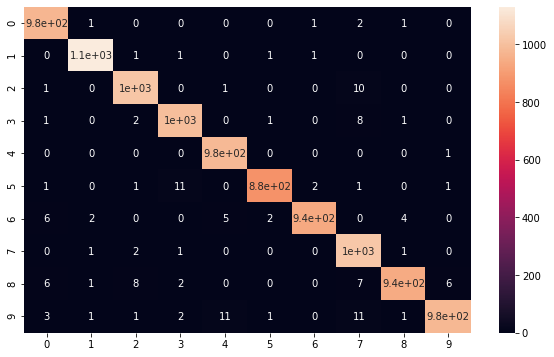

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True);